# Linear Regression:

Linear Regression is one of the easiest algorithms in machine learning. In this notebook this algorithm wil be explored and implemented using Python from scratch.

As the name suggests this algorithm is applicable for Regression problems. Linear Regression is a Linear Model. Which means, establishing a linear relationship between the input variables(X) and single output variable(Y). When the input(X) is a single variable this model is called Simple Linear Regression and when there are mutiple input variables(X), it is called Multiple Linear Regression.

# Simple Linear Regression:

We discussed that Linear Regression is a simple model. Simple Linear Regression is the simplest model in machine learning.

# Model Representation

In this problem we have an input variable - X and one output variable - Y. And we want to build linear relationship between these variables. Here the input variable is called Independent Variable and the output variable is called Dependent Variable. We can define this linear relationship as follows:

                                                    y=a+bx

'a' is called as a scale factor or coefficient, and 'b' is called bias coefficient. The bias coeffient gives an extra degree of freedom to this model. This equation is similar to the line equation y = mx + b with m=b(slope) and b=a(intercept). So in this Simple Linear Regression model we want to draw a line between X and Y which estimates the relationship between X and Y.

To find these coefficients there are different approaches like ordinary least square, gradient descent. In this notebook, we will use ordinary least square method. 

# Ordinary Least Square:

Ordinary least squares, or linear least squares, estimates the parameters in a regression model by minimizing the sum of the squared residuals. This method draws a line through the data points that minimizes the sum of the squared differences between the observed values and the corresponding fitted values.

# Implementation:

We are going to use a dataset containing modes of advertising and sales of a product. This data set has many features. But, we will not use all of them. We will just deal with the TV  advertising and its impact on the sales.

In [33]:
# Importing Necessary Libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Reading Data
data = pd.read_csv('Downloads/advertising.csv')
print(data.shape)
data.head()

(200, 4)


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [34]:
# Collecting X and Y
X= data.iloc[:,:1].values
Y= data.iloc[:,3:].values

### To find the values of a and b we will need the mean of X and y. We will find these and the coefficients.

In [35]:
# Mean X and Y
mean_x = np.mean(X)
mean_y = np.mean(y)

# Total number of values
m = len(X)

# Using the formula to calculate b1 and b2
numer = 0
denom = 0
for i in range(m):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
b = numer / denom
a = mean_y - (b * mean_x)

# Print coefficients
print(b, a)

[0.05546477] [7.05843463]


### Thus, we have our coeffcients.

#                     Sales= 6.974821488229903+0.05546477046955879TV

This is our linear model.

To see this graphically:

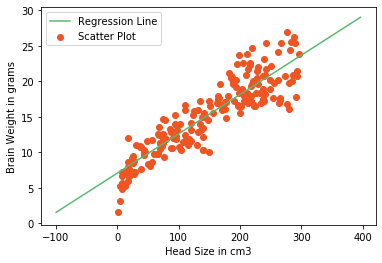

In [36]:
# Plotting Values and Regression Line

max_x = np.max(X) + 100
min_x = np.min(X) - 100

# Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = a + b * x

# Ploting Line
plt.plot(x, y, color='#58b970', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X, Y, c='#ef5423', label='Scatter Plot')

plt.xlabel('Head Size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()

# Root Mean Square Error:

Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells how concentrated the data is around the line of best fit.

# Calculating Root Mean Squares Error:

In [37]:
rmse = 0
for i in range(m):
    y_pred = a + b * X[i]
    rmse += (Y[i] - y_pred) ** 2
rmse = np.sqrt(rmse/m)
print(rmse)

[2.28576794]


# R squared:

R-squared is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination.

R-squared is always between 0 and 100%:

# Calculating R Squared:

In [38]:
ss_t = 0
ss_r = 0
for i in range(m):
    y_pred = a + b * X[i]
    ss_t += (Y[i] - mean_y) ** 2
    ss_r += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_r/ss_t)
print(r2)

[0.81197136]


# The scikit-learn approach:

scikit-learn is simple machine learning library in Python. Building Machine Learning models are very easy using scikit-learn.   Building this Simple Linear Regression Model using scikit-learn.

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Cannot use Rank 1 matrix in scikit learn
X = X.reshape((m, 1))
# Creating Model
reg = LinearRegression()
# Fitting training data
reg = reg.fit(X, Y)
# Y Prediction
Y_pred = reg.predict(X)

# Calculating RMSE and R2 Score
mse = mean_squared_error(Y, Y_pred)
rmse = np.sqrt(mse)
r2_score = reg.score(X, Y)

print(np.sqrt(mse))
print(r2_score)

2.2842381438447106
0.8121757029987413


This exactly equals to model we built from scratch, but simpler and less code.